# Use of RFID technology to characterize hummingbird feeder visitations and social network 

### Ruta R. Bandivadekar, Pranav S. Pandit, Rahel Sollmann, Michael J. Thomas, Scott Logan, Jennifer Brown, A.P. Klimley, and Lisa A. Tell

The notebook demonstrates analysis presented in the manuscript 

We developed a Python package *'taggit'* for reading the tag detection data collapsing it into visits and visualization of PIT tagged hummigbird activity at the novel feeding stations.  

In [1]:
## setting up local path and importing python packages
data_path = 'C:/Users/Falco/Desktop/directory/HHCP/RFID'
path = 'C:/Users/Falco/Desktop/directory/taggit'
output_path = 'C:/Users/Falco/Desktop/directory/taggit/outputs'

## importing python packages
import os as os
import pandas as pd
%matplotlib inline 
from bokeh.io import show, output_file , output_notebook, save
output_notebook()
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool, BoxZoomTool, ResetTool, PanTool, WheelZoomTool, graphs
from bokeh.palettes import Spectral4
from matplotlib import pyplot as plt
os.chdir(path)
from scipy import stats 
import numpy as np
from scipy import stats
import joypy
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm

# Importing the taggit package
from taggit import functions as HT
from taggit import interactions as Hxnet

import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1
dpi = 1000

Loading BokehJS ...

Loading BokehJS ...

## importing data
function: ** read_tag_files**

this function will 

    1.read all text files from a folder (just keep tag files in this folder no other txt files)
    2.remove unwanted tag reads: fishtags, other removes which were some mistakes done during installing readers
    3.ability to restrict analysis to to specific location/readers this function will filter the data accordingly
    4.for the current analysis presented in the paper we are not inlcuding rufous humminbirds

In [2]:
tag_data = HT.read_tag_files(data_path = data_path+'\Paper', select_readers = ['A1', 'A4', 'A5', 'A8', 'A9', 'B1', 'B2', "B3"], 
                            remove_rufous= True)

Beacuse of battery and power problems A4 reader was not function for some time. We use data from A2 reader which for a top reader from the DAFS for that duration 

In [3]:
A2 = HT.read_tag_files(data_path = data_path+'\Paper', select_readers = ['A2'], 
                            remove_rufous= True)
A2 = A2.ix['2018-01-26':'2018-04-30']
A2.Reader.replace('A2', 'A4', inplace= True)
tag_data = pd.concat([tag_data, A2])

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


see first 5 lines in the dataframe

In [4]:
tag_data.head()

,Date,Time,Reader,Tag,ID,DateTime
DateTime,,,,,,
2016-09-09 09:55:46,2016-09-09,10:55:46,A1,TAG,3D6.00184967C6,2016-09-09 09:55:46
2016-09-09 10:23:19,2016-09-09,11:23:19,A1,TAG,3D6.00184967AE,2016-09-09 10:23:19
2016-09-09 10:29:56,2016-09-09,11:29:56,A1,TAG,3D6.00184967C6,2016-09-09 10:29:56
2016-09-09 10:58:03,2016-09-09,11:58:03,A1,TAG,3D6.00184967C6,2016-09-09 10:58:03
2016-09-09 11:29:04,2016-09-09,12:29:04,A1,TAG,3D6.00184967C6,2016-09-09 11:29:04


In [5]:
print ('number of tag reads during study period= '+str(tag_data.shape[0]))

number of tag reads during study period= 118234


in the manuscript we are analysing data only until March 2018

In [6]:
tag_data = tag_data.ix[:'2018-03-31']

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


### list of bird ids visiting the feeder

In [7]:
tag_data.ID.unique()

array(['3D6.00184967C6', '3D6.00184967AE', '3D6.00184967B9',
       '3D6.00184967D6', '3D6.00184967D3', '3D6.00184967D7',
       '3D6.00184967B5', '3D6.00184967A3', '3D6.00184967A1',
       '3D6.00184967C3', '3D6.00184967A9', '3D6.00184967B0',
       '3D6.00184967AB', '3D6.00184967DB', '3D6.00184967C4',
       '3D6.00184967A8', '3D6.00184967D0', '3D6.00184967F4',
       '3D6.00184967BE', '3D6.00184967B6', '3D6.00184967D2',
       '3D6.00184967A4', '3D6.00184967EF', '3D6.00184967CB',
       '3D6.00184967F5', '3D6.0018496801', '3D6.00184967DA',
       '3D6.00184967CC', '3D6.00184967C5', '3D6.00184967E4',
       '3D6.00184967FE', '3D6.00184967E1', '3D6.00184967DD',
       '3D6.00184967D9', '3D6.0018496802', '3D6.00184967E2',
       '3D6.1D593D7826', '3D6.1D593D785E', '3D6.1D593D783E',
       '3D6.1D593D7828', '3D6.1D593D7858', '3D6.1D593D7868',
       '3D6.1D593D7877', '3D6.1D593D783F', '3D6.1D593D7831',
       '3D6.1D593D7872', '3D6.1D593D786F', '3D6.1D593D7853',
       '3D6.1D593D782C',

In [8]:
len(tag_data.ID.unique())

155

### collapse_reads_10_seconds

this function will

    1. for each individual bird, it will calculate different between each reads
    2. if the difference is more that 0.11 seconds it will identify it as a new visit.
    3. for each new visit, it will identify the starting time, ending time
    

In [9]:
visit_data = HT.collapse_reads_10_seconds(data= tag_data)

In [10]:
visit_data.head()

,visit_start,visit_end,ID,Tag,visit_duration
0,2016-09-25 05:53:00,2016-09-25 05:53:00,3D6.00184967A1,A1,0 days
1,2016-10-26 13:32:31,2016-10-26 13:32:31,3D6.00184967A1,A1,0 days
2,2016-10-26 13:33:34,2016-10-26 13:33:34,3D6.00184967A1,A1,0 days
3,2016-10-26 14:38:35,2016-10-26 14:38:35,3D6.00184967A1,A1,0 days
4,2016-10-26 15:10:45,2016-10-26 15:10:45,3D6.00184967A1,A1,0 days


In [11]:
#visit_data.to_csv(output_path +'\Collapsed_visits.csv')
#visit_data.to_csv(team_path +'\Collapsed_visits.csv')

number of visits recorded

In [12]:
print ('number of visits recorded during study period= '+str(visit_data.shape[0]))

number of visits recorded during study period= 65476


### read metadata file

this function will

    1. read the master metadata file for all the birds PIT tagged until now
    2. filter the data according to the study location 

In [13]:
meta = HT.read_metadata(data_path = data_path+"/Paper" , filename = 'PIT tagged Birds Info_HHCP_For manuscript_04_16_2018.xlsx', 
                       restrict = True)
meta = meta.drop_duplicates('Tag Hex', keep= 'first')
meta['Location Id'].unique()
## removing data for birds tagged in another site not in this study
remove_glide = list(set(meta[meta['Location Id'] == 'GR']['Tag Hex'].unique().tolist()).difference(set(visit_data.ID.unique().tolist())))
meta = meta[~meta['Tag Hex'].isin(remove_glide)]
meta.Species.unique()
meta.shape

(230, 12)

In [14]:
meta.Species.unique()

array([u'ANHU', u'ALHU'], dtype=object)

In [15]:
meta.head()

,SrNo.,Tagged Date,Location Id,Tag Hex,Tag Dec,Species,Age,Sex,Band Number,Location,Notes,True Unknowns
0,1,2016-09-02,SB,3D6.00184967FF,982.000407,ANHU,HY,F,NaN,Manfreds,NaN,NaN
1,2,2016-09-02,SB,3D6.00184967FC,982.000407,ANHU,HY,F,NaN,Manfreds,NaN,NaN
2,3,2016-09-02,SB,3D6.00184967B0,982.000407,ANHU,AHY,M,NaN,Manfreds,NaN,NaN
3,4,2016-09-02,SB,3D6.00184967F3,982.000407,ANHU,HY,M,NaN,Manfreds,NaN,NaN
4,5,2016-09-02,SB,3D6.00184967DF,982.000407,ANHU,AHY,F,NaN,Manfreds,NaN,NaN


### merge TAG data and Metadata

this function will
    1. merge the tag read data with the metadata using the 'Tag Hex' column
    2. Merge the data only after running **collapse_reads_10_seconds** function 
    3. identifies birds which were tagged and found on the same day in 2016

In [16]:
data = HT.merge_metadata(data = visit_data, metadata = meta, for_paper = False)

3D6.00184967A3 date same, first recorded 2016-09-23 08:56:09  tagged on 2016-09-23
3D6.00184967AE date same, first recorded 2016-09-09 10:23:19  tagged on 2016-09-09
3D6.00184967B5 date same, first recorded 2016-09-23 08:54:49  tagged on 2016-09-23
3D6.00184967C6 date same, first recorded 2016-09-09 09:55:46  tagged on 2016-09-09
3D6.00184967D3 date same, first recorded 2016-09-23 08:52:58  tagged on 2016-09-23
3D6.00184967D6 date same, first recorded 2016-09-23 08:05:57  tagged on 2016-09-23
3D6.00184967D7 date same, first recorded 2016-09-23 08:54:00  tagged on 2016-09-23
3D6.00184967DB date same, first recorded 2016-10-21 08:20:40  tagged on 2016-10-21


In [17]:
a = meta['Tag Hex'].unique().tolist()
data = data[data['ID'].isin(a)]

In [18]:
meta.Location.unique()

array([u'Manfreds', u'Arboretum', u'Glide Ranch', u"Susan's"],
      dtype=object)

In [19]:
data['Location'].value_counts()

Arboretum      25210
Susan's        18478
Manfreds       14609
Glide Ranch      753
Name: Location, dtype: int64

In [20]:
data.Species.unique()

array([u'ANHU', u'ALHU'], dtype=object)

In [21]:
data.Species.value_counts(normalize=True)

ANHU    0.908535
ALHU    0.091465
Name: Species, dtype: float64

In [22]:
Bird_summary, reader_predilection = HT.bird_summaries(data = data,
                                 output_path = output_path,
                                 metadata = meta)

In [23]:
Bird_summary[['obser_period', 'first_obs_aft_tag', 'date_u']].describe()

,obser_period,first_obs_aft_tag,date_u
count,141,141,141.000000
mean,88 days 19:44:40.851063,31 days 10:33:11.489361,24.581560
std,110 days 01:02:39.808943,58 days 15:34:02.081666,44.338174
min,0 days 00:00:00,0 days 00:00:00,1.000000
25%,16 days 00:00:00,0 days 00:00:00,2.000000
50%,34 days 00:00:00,5 days 00:00:00,4.000000
75%,122 days 00:00:00,32 days 00:00:00,28.000000
max,554 days 00:00:00,444 days 00:00:00,289.000000


# Table 1 

In [24]:
pd.pivot_table(meta, index = 'Species', columns=['Sex', 'Age'], values='Tag Hex', aggfunc='count', margins= True, fill_value=0)

Sex       F           M          All
Age     AHY  HY UNK AHY  HY UNK     
Species                             
ALHU      6   0   8  26   2  21   63
ANHU     27  23  18  39  40  20  167
All      33  23  26  65  42  41  230

In [25]:
pd.pivot_table(meta, index = 'Species', columns='Age', values='Tag Hex', aggfunc='count', margins= True, fill_value=0)

Age,AHY,HY,UNK,All
Species,,,,
ALHU,32,2,29,63
ANHU,66,63,38,167
All,98,65,67,230


In [26]:
table1 = HT.report_Table1A(metadata = meta, location= ['SB', 'Arbo -1 ','BH', 'GR'])
table1.to_csv(output_path+'/table1.csv')
table1

Species,Allen's Hummingbird,Anna's Hummingbird,All
Sex,,,
female,14,68,82
male,49,99,148
All,63,167,230


# Table 2

In [27]:
table2 = HT.report_Table2Paper(metadata = meta, location= ['SB', 'Arbo -1 ','BH', 'GR'] )
table2.to_csv(output_path+'/table2.csv')
table2

Species,Allen's Hummingbird,Anna's Hummingbird,All
Location Id,,,
Arbo -1,0,36,36
BH,63,78,141
GR,0,3,3
SB,0,50,50
All,63,167,230


# Table 4

In [28]:
table4 = HT.paper_Table2(data = data, metadata = meta, location= ['SB', 'Arbo -1 ','BH', 'GR'])
table4.to_csv(output_path+'/table4.csv')
table4

Sex                           female                                male  \
Age                 after hatch year hatch year unknown after hatch year   
Species                                                                    
Allen's Hummingbird                3          0       6               12   
Anna's Hummingbird                18         17       6               28   
All                               21         17      12               40   

Sex                                     All  
Age                 hatch year unknown       
Species                                      
Allen's Hummingbird          1      12   34  
Anna's Hummingbird          25      13  107  
All                         26      25  141

In [29]:
pd.pivot_table(data, columns='Sex', index='Species', aggfunc='nunique', values='ID')

Sex,F,M
Species,,
ALHU,9,25
ANHU,41,66


In [30]:
pd.pivot_table(data, columns='Age', index='Species', aggfunc='nunique', values='ID')

Age,AHY,HY,UNK
Species,,,
ALHU,15,1,18
ANHU,46,42,19


# Figure 5: 

### Daily visitations of PIT- tagged male and female Anna’s Hummingbirds at the feeding stations at Sites 1 and 2 in Northern California and Site 3 in Southern California from September 2016 to March 2018. 

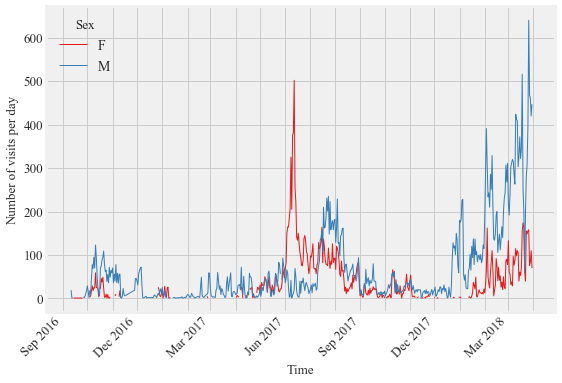

In [31]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
data.Sex.fillna('unknown', inplace= True)
alhu_data = data[data.Species == "ALHU"]
anhu_data = data[data.Species == "ANHU"]
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']+1
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']

def plotvisits(timeunit, data, ax, c = ['#e41a1c', '#377eb8', '#4daf4a'], style = '-'):
    """timeunite: 10Min, D =  day, W = week, M = month"""
    if timeunit == '10Min':
        t = '10 minutes'
    elif timeunit == 'D':
        t = 'day'
    elif timeunit == 'W':
        t = 'week'
    if timeunit == 'M':
        t = 'month'
    a = data.groupby([ pd.Grouper(freq=timeunit), 'Sex'])['ID'].count().unstack('Sex')
    a.plot(kind="line", style = style, rot =45, ax= ax,stacked=False, color = c,)
    
    #set ticks every month
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    ## hiding every second month
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % 3 != 0:
            label.set_visible(False)
    
    #ax.set_title('visits per '+t)
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of visits per day')

f, (ax1)  = plt.subplots(1, 1, figsize=(8,6))
plotvisits(timeunit= 'D', data = anhu_data, ax= ax1)

f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(output_path + '\Figure4.png', dpi = dpi)
plt.savefig(output_path + '\Figure4.eps',format = 'eps', dpi = dpi)
plt.show()

In [32]:
[item.get_text() for item in ax1.get_xticklabels()]

[u'Sep 2016',
 u'Oct 2016',
 u'Nov 2016',
 u'Dec 2016',
 u'Jan 2017',
 u'Feb 2017',
 u'Mar 2017',
 u'Apr 2017',
 u'May 2017',
 u'Jun 2017',
 u'Jul 2017',
 u'Aug 2017',
 u'Sep 2017',
 u'Oct 2017',
 u'Nov 2017',
 u'Dec 2017',
 u'Jan 2018',
 u'Feb 2018',
 u'Mar 2018',
 u'Apr 2018']

In [33]:
anhu_data.index

DatetimeIndex(['2016-09-25 05:53:00', '2016-10-26 13:32:31',
               '2016-10-26 13:33:34', '2016-10-26 14:38:35',
               '2016-10-26 15:10:45', '2016-10-26 15:46:14',
               '2016-10-26 16:12:54', '2016-10-27 10:38:53',
               '2016-10-28 09:12:40', '2016-10-29 10:53:49',
               ...
               '2018-03-06 07:31:05', '2018-03-06 07:31:20',
               '2018-03-06 10:35:45', '2018-03-06 10:36:07',
               '2018-02-27 16:45:14', '2018-03-06 16:03:50',
               '2018-02-28 13:10:57', '2018-02-28 13:12:39',
               '2018-02-28 13:13:00', '2018-02-28 13:13:14'],
              dtype='datetime64[ns]', name=u'visit_start', length=53649, freq=None)

In [34]:
data.shape

(59050, 19)

### Tagging activity Figure 5 Inset: The cumulative tagging effort throughout the study.

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.resample() is now a deferred operation
You called cumsum(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  # Remove the CWD from sys.path while we load stuff.


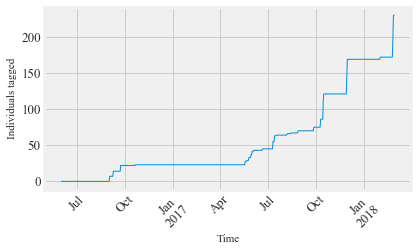

In [35]:
import matplotlib.dates as mdates
fig, ax1 = plt.subplots(1, figsize=(6,4))
idx = pd.date_range('06.01.2016', '02.28.2018')
a = meta.groupby('Tagged Date')['Tag Hex'].nunique()
a.index = pd.DatetimeIndex(a.index)
a = a.reindex(idx, fill_value=0)
#tl = a.cumsum()
#tl.columns = ['sampling']
#tl.plot.line(drawstyle = 'steps', label='Animals', rot =45,ax = ax1)
a.resample('D').cumsum().plot(kind="line", rot =45,ax = ax1)
#set ticks every month
#ax1.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

## hiding every second month
#for index, label in enumerate(ax1.xaxis.get_ticklabels()):
#    if index % 3 != 0:
#        label.set_visible(False)

ax1.set_ylabel('Individuals tagged', fontsize = 11)
ax1.set_xlabel('Time', fontsize = 11)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(output_path+'/'+'cumulative_tagging.png', dpi = dpi)
plt.savefig(output_path+'/'+'cumulative_tagging.eps',format = 'eps',  dpi = dpi)
plt.show()

# Figure 6:

### Comparison of the daily detections from the two different antennas at the double antenna feeding station  transceiver at Site 2 over time. The top antenna for this feeding station was deployed in May 2017 and discontinued in January 2018 for data collection. Overall, the total number of visits detected by the side antenna exceeded the number of visits for the top antenna but not enough to warrant the addition of a second antenna. Both antennas detected the presence of the same number of individual birds.

In [36]:
## Top reader
tag_dataA2 = HT.read_tag_files(data_path = data_path+'\Paper', select_readers = ['A2'], )
visit_dataA2 = HT.collapse_reads_10_seconds(data= tag_dataA2)
dataA2 = HT.merge_metadata(data = visit_dataA2, metadata = meta, for_paper = True)

## Side reader
tag_dataA4 = HT.read_tag_files(data_path = data_path+'\Paper', select_readers = ['A4'])
visit_dataA4 = HT.collapse_reads_10_seconds(data= tag_dataA4)
dataA4 = HT.merge_metadata(data = visit_dataA4, metadata = meta, for_paper = True)

dataA4 = dataA4.ix['2017-05-23':'2018-01-25']
dataA2 = dataA2.ix['2017-05-23':'2018-01-25']

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [37]:
print ('side antenna recorded ' +str(dataA4.shape[0]) + ' visits')

side antenna recorded 7825 visits


In [38]:
print ('top antenna recorded ' +str(dataA2.shape[0]) + ' visits')

top antenna recorded 7620 visits


In [39]:
print ('side antenna recorded ' +str(len(dataA4.ID.unique())) + ' PIT tagged birds')

side antenna recorded 20 PIT tagged birds


In [40]:
print ('top antenna recorded ' +str(len(dataA2.ID.unique())) + ' PIT tagged birds')

top antenna recorded 20 PIT tagged birds


# Figure 6

In [41]:
dpi = 1000

C:\Users\Falco\Anaconda2\lib\site-packages\matplotlib\legend.py:649: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


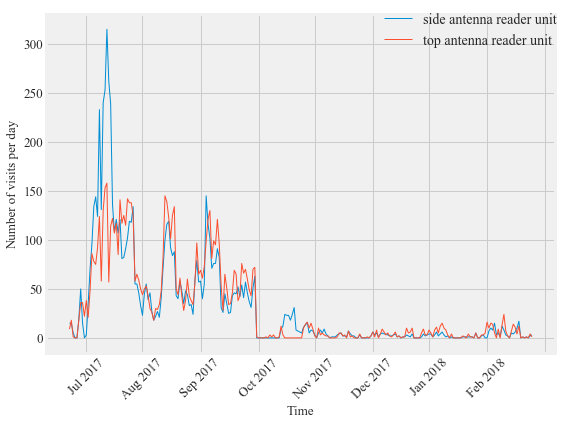

In [42]:
def plotvisits(timeunit, data, ax, c = ['#e41a1c', '#377eb8', '#4daf4a']):
           
        """timeunite: 10Min, D =  day, W = week, M = month"""
        if timeunit == '10Min':
            t = '10 minutes'
        elif timeunit == 'D':
            t = 'day'
        elif timeunit == 'W':
            t = 'week'
        if timeunit == 'M':
            t = 'month'
        data.groupby([ pd.Grouper(freq=timeunit)])['ID'].count().plot(kind="line", rot =45, ax= ax)
        
        #set ticks every month
        #ax.xaxis.set_major_locator(mdates.MonthLocator())
        #set major ticks format
        #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))

        ## hiding every second month
        #for index, label in enumerate(ax.xaxis.get_ticklabels()):
        #    if index % 3 != 0:
        #        label.set_visible(False)

        #ax.set_title('visits per '+t)
        ax.set_xlabel('Time')
        ax.set_ylabel('Number of visits per day')

                
f, (ax1)  = plt.subplots(1, 1, figsize=(8,6))
plotvisits(timeunit= 'D', data= dataA4, ax= ax1)
plotvisits(timeunit= 'D', data= dataA2, ax= ax1)
labels = ['Jun 2017', 'Jul 2017', 'Aug 2017','Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018']
ax1.set_xticklabels(labels)
#set ticks every month
#ax1.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))

## hiding every second month
#for index, label in enumerate(ax1.xaxis.get_ticklabels()):
#    if index % 3 != 0:
#        label.set_visible(False)
f.legend(['side antenna reader unit', 'top antenna reader unit'],loc = 'best')
#f.suptitle('Hummingbird visits to feeders', fontsize = 24)
f.tight_layout()#rect=[0, 0.03, 1, 0.95]
f.savefig(output_path+'/Figure 5.png', dpi = dpi)
f.savefig(output_path+'/'+'Figure 5.eps',format = 'eps',  dpi = dpi)
plt.show()

## Gender association with activity of bird visitation metrices

C:\Users\Falco\Anaconda2\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


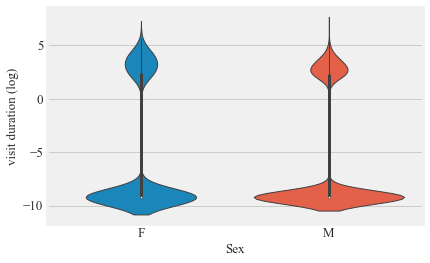

In [43]:
v = pd.merge(visit_data, meta, left_on='ID', right_on='Tag Hex', how='left')
sns.violinplot(v.Sex,np.log((v.visit_duration / np.timedelta64(1, 's')).astype(int)+0.0001))
plt.ylabel('visit duration (log)')
plt.show()

In [44]:
data.visit_duration.describe()

count                     59050
mean     0 days 00:00:07.291244
std      0 days 00:00:17.425316
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             0 days 00:00:10
max             0 days 00:10:15
Name: visit_duration, dtype: object

In [45]:
Bird_summary.duration_total.describe()

count      141.000000
mean      3053.531915
std       8455.482026
min          0.000000
25%          0.000000
50%          0.000000
75%       1331.000000
max      59922.000000
Name: duration_total, dtype: float64

# Short visits

In [46]:
v_s = v[v.visit_duration =='0 seconds']
v_s.shape

(48713, 17)

In [47]:
v_s.visit_duration.sum()

Timedelta('0 days 00:00:00')

## Long visits

In [48]:
v_d = v[v.visit_duration>'0 seconds']
v_d.shape

(16763, 17)

## Total time observed

In [49]:
v_d.visit_duration.sum()

Timedelta('5 days 05:01:30')

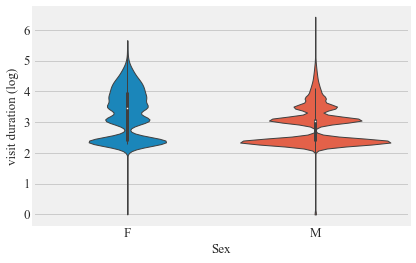

In [50]:
sns.violinplot(v_d.Sex,np.log((v_d.visit_duration / np.timedelta64(1, 's')).astype(int)+0.0001), cut=0)
plt.ylabel('visit duration (log)')
plt.show()

## difference in the visit duration males vs females

In [51]:
Bird_summary.Sex.unique()

array([u'F', u'M'], dtype=object)

In [52]:
v_d.head()

,visit_start,visit_end,ID,Tag,visit_duration,SrNo.,Tagged Date,Location Id,Tag Hex,Tag Dec,Species,Age,Sex,Band Number,Location,Notes,True Unknowns
274,2017-10-10 10:06:29,2017-10-10 10:06:40,3D6.00184967A1,A1,00:00:11,16.0,2016-09-23,SB,3D6.00184967A1,982.000407,ANHU,HY,F,NaN,Manfreds,NaN,NaN
278,2017-10-10 10:08:17,2017-10-10 10:08:27,3D6.00184967A1,A1,00:00:10,16.0,2016-09-23,SB,3D6.00184967A1,982.000407,ANHU,HY,F,NaN,Manfreds,NaN,NaN
280,2017-10-10 11:15:46,2017-10-10 11:15:56,3D6.00184967A1,A1,00:00:10,16.0,2016-09-23,SB,3D6.00184967A1,982.000407,ANHU,HY,F,NaN,Manfreds,NaN,NaN
282,2017-10-10 11:19:53,2017-10-10 11:20:25,3D6.00184967A1,A1,00:00:32,16.0,2016-09-23,SB,3D6.00184967A1,982.000407,ANHU,HY,F,NaN,Manfreds,NaN,NaN
284,2017-10-10 11:46:45,2017-10-10 11:46:56,3D6.00184967A1,A1,00:00:11,16.0,2016-09-23,SB,3D6.00184967A1,982.000407,ANHU,HY,F,NaN,Manfreds,NaN,NaN


In [53]:
v_d['visit_duration_seconds'] = v_d['visit_duration'].dt.total_seconds()
trial = v_d.groupby(['ID', 'Sex']).visit_duration_seconds.mean()
trial = pd.DataFrame(trial)
trial.columns = ['duration_mean']
trial.reset_index(inplace= True)
trial.head()

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ID,Sex,duration_mean
0,3D6.00184967A1,F,43.838710
1,3D6.00184967A2,F,40.178049
2,3D6.00184967A4,M,27.726704
3,3D6.00184967A6,M,21.397590
4,3D6.00184967A7,F,21.530667


In [54]:
m_v_d1 = trial[trial.Sex== 'M']
m_v_d = m_v_d1.duration_mean #/ np.timedelta64(1, 's')
f_v_d1 = trial[trial.Sex== 'F']
f_v_d = f_v_d1.duration_mean #/ np.timedelta64(1, 's')

In [55]:
print (np.mean(f_v_d), np.std(f_v_d), len(f_v_d) )

(25.110059470897557, 11.969362949243743, 25)


In [56]:
print (np.mean(m_v_d), np.std(m_v_d), len(m_v_d) )

(23.43185166728472, 11.273722727146934, 45)


In [57]:
stats.kruskal(m_v_d, f_v_d)

KruskalResult(statistic=0.25264184738533463, pvalue=0.6152209840639247)

##### Comparison of median

In [58]:
stats.median_test(f_v_d, m_v_d)

(0.24888888888888888, 0.6178585337664037, 21.76533333333333, array([[14, 21],
        [11, 24]], dtype=int64))

In [59]:
print 'male median visit time '+ str( np.median(m_v_d))
print 'female median visit time '+ str( np.median(f_v_d))

male median visit time 21.233055885850177
female median visit time 22.832512315270936


In [60]:
print 'male mean visit time '+ str( np.mean(m_v_d))
print 'female means visit time '+ str( np.mean(f_v_d))

male mean visit time 23.4318516673
female means visit time 25.1100594709


In [61]:
print 'male std visit time '+ str( np.std(m_v_d))
print 'female std visit time '+ str( np.std(f_v_d))

male std visit time 11.2737227271
female std visit time 11.9693629492


In [62]:
print 'male std visit time '+ str( m_v_d.shape)
print 'female std visit time '+ str( f_v_d.shape)

male std visit time (45L,)
female std visit time (25L,)


### Proportoin of time present

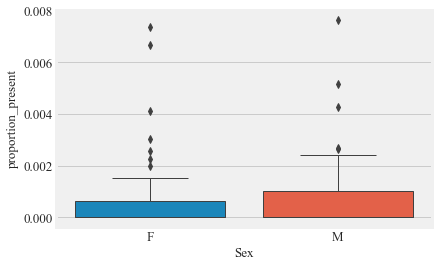

In [63]:
Bird_summary['proportion_present'] = Bird_summary.duration_total/(Bird_summary.date_u*86400)
Bird_summary['proportion_present'].describe()
sns.boxplot(Bird_summary.Sex,Bird_summary.proportion_present)
plt.show()

In [64]:
m_pt = Bird_summary[Bird_summary.Sex== 'M']
f_pt = Bird_summary[Bird_summary.Sex== 'F']
stats.mannwhitneyu(m_pt.proportion_present, f_pt.proportion_present)

MannwhitneyuResult(statistic=2252.5, pvalue=0.45957163430402526)

In [65]:
m_pt.proportion_present.describe()

count    91.000000
mean      0.000651
std       0.001232
min       0.000000
25%       0.000000
50%       0.000000
75%       0.001028
max       0.007655
Name: proportion_present, dtype: float64

In [66]:
f_pt.proportion_present.describe()

count    50.000000
mean      0.000731
std       0.001580
min       0.000000
25%       0.000000
50%       0.000006
75%       0.000628
max       0.007378
Name: proportion_present, dtype: float64

In [67]:
Bird_summary.proportion_present.describe()

count    141.000000
mean       0.000680
std        0.001361
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000874
max        0.007655
Name: proportion_present, dtype: float64

# Diel activity of Humminbirds

# Figure 7:

### Diel plots of mean hourly hummingbird visits to the feeding stations at three sites at northern and southern California from September 2016 to March 2018. The bar denotes the mean hourly visits by hummingbirds and black lines show the standard error. All distributions were statistically non-uniform (probability values reported by season).

C:\Users\Falco\Anaconda2\lib\site-packages\matplotlib\projections\polar.py:58: RuntimeWarning: invalid value encountered in less
  mask = r < 0


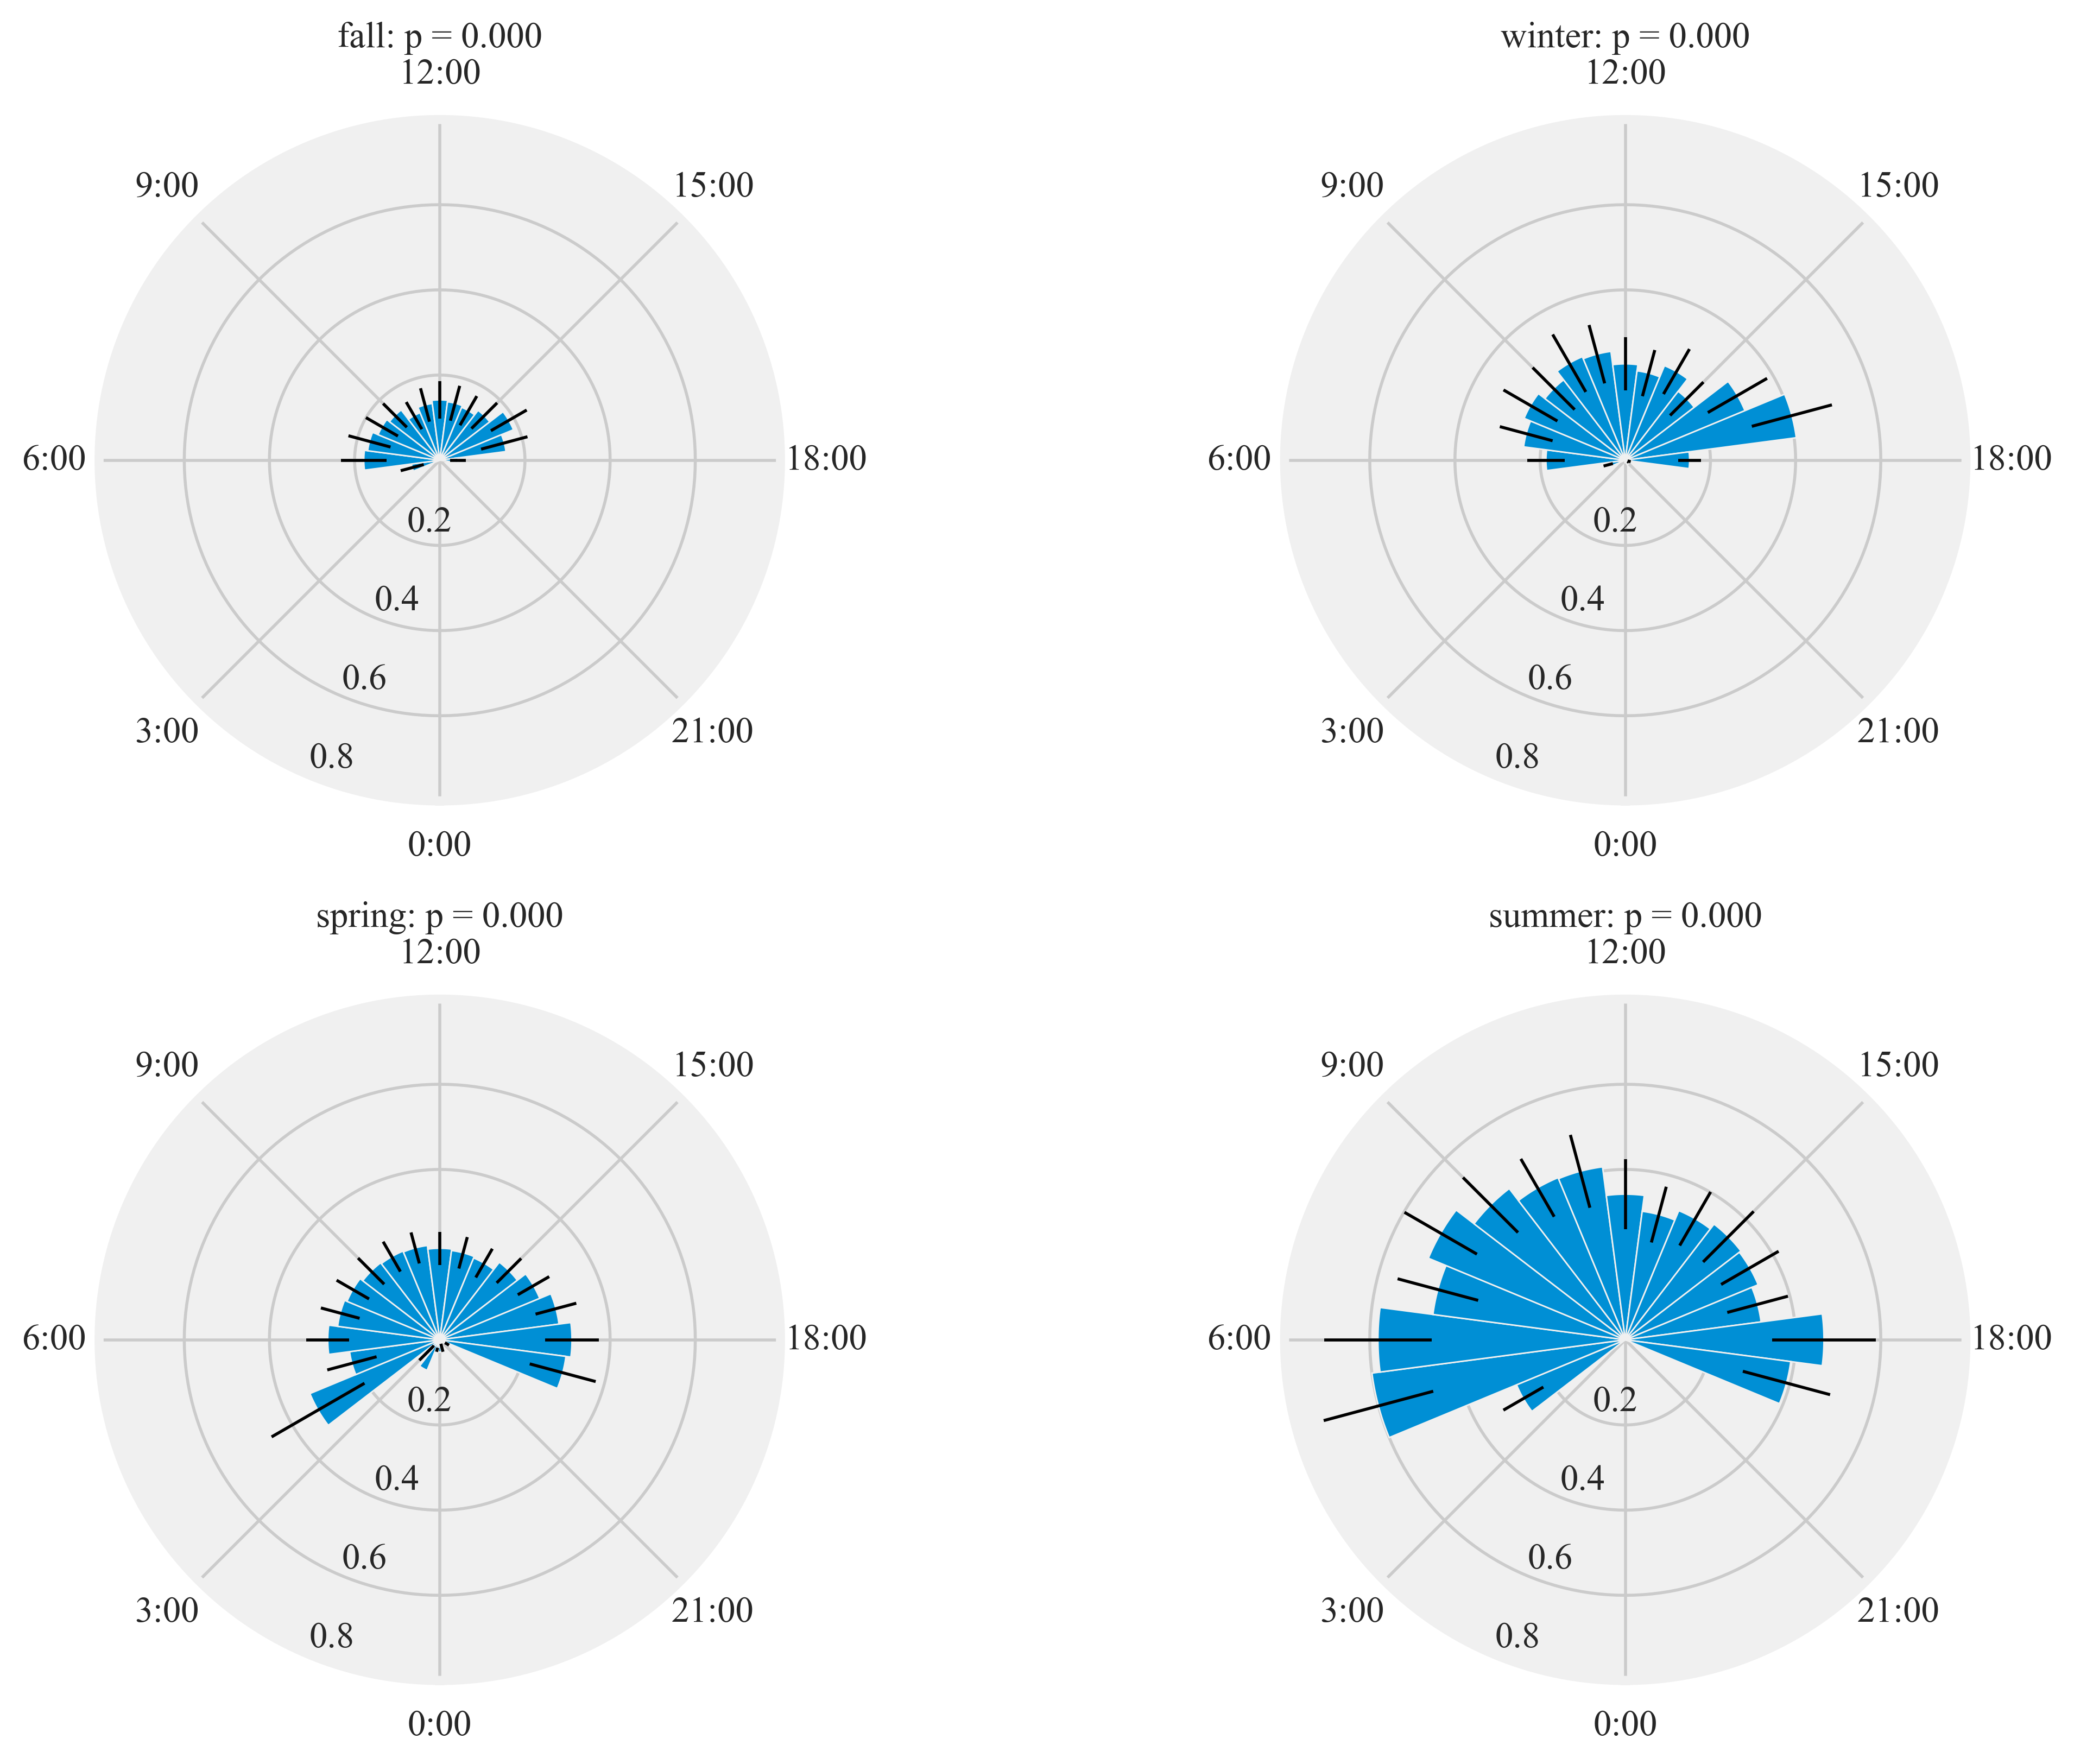

Rayleigh test identify a non-uniform distribution, i.e. it is
designed for detecting an unimodal deviation from uniformity
winter: p =  0.000
spring: p =  0.000
summer: p =  0.000
fall: p =  0.000
Wall time: 20.9 s


In [68]:
%%time
plt.rcParams['xtick.major.pad']='8'
HT.diurnal_variation(dataframe = data, output_path = output_path)

### bird_summaries

This function:

1. calculates summaries for each tagged bird
2. save a csv file with summary output
3. columns are 

Tag Hex,Species,Sex, Age, tagged_date, first_obs_aft_tag, date_min, date_max, obser_period, date_u, Location

# Night time activity

## Birds that showed activity between 10 PM to 4 AM 

In [69]:
visit_data.set_index(pd.DatetimeIndex(visit_data['visit_start']), inplace= True)
import datetime
start = datetime.time(22,0,0)
end = datetime.time(4,0,0)
visit_data.between_time(start, end).ID.unique().tolist()

['3D6.00184967A4',
 '3D6.00184967A7',
 '3D6.00184967AD',
 '3D6.00184967AF',
 '3D6.00184967BC',
 '3D6.00184967BF',
 '3D6.1D593D7848']

### number of visits in night by birds

In [70]:
import numpy as np
n = visit_data.between_time(start, end)
n['date']= n.index.date
n.groupby(['ID', 'date']).visit_start.count()

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ID              date      
3D6.00184967A4  2018-01-04     3
                2018-01-06     1
3D6.00184967A7  2017-06-19     1
3D6.00184967AD  2017-05-22     2
                2017-05-23    11
                2017-05-24     7
                2017-05-25     4
3D6.00184967AF  2017-05-23     2
                2017-05-24     3
                2017-05-25     1
                2018-01-05     3
                2018-01-06     1
3D6.00184967BC  2017-06-19     1
3D6.00184967BF  2018-01-04     1
                2018-02-10     1
3D6.1D593D7848  2018-02-13     1
Name: visit_start, dtype: int64

In [71]:
n.describe()

,visit_duration
count,43
mean,0 days 00:00:06.488372
std,0 days 00:00:14.921017
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,0 days 00:01:05


In [72]:
date_format='%H:%M:%S'

## Time spent at the feeder in a night

In [73]:
n.groupby(['ID', 'date']).visit_duration.sum()

ID              date      
3D6.00184967A4  2018-01-04   00:01:27
                2018-01-06   00:00:00
3D6.00184967A7  2017-06-19   00:00:43
3D6.00184967AD  2017-05-22   00:00:00
                2017-05-23   00:00:00
                2017-05-24   00:00:00
                2017-05-25   00:00:00
3D6.00184967AF  2017-05-23   00:00:00
                2017-05-24   00:00:00
                2017-05-25   00:00:00
                2018-01-05   00:01:14
                2018-01-06   00:00:00
3D6.00184967BC  2017-06-19   00:01:05
3D6.00184967BF  2018-01-04   00:00:00
                2018-02-10   00:00:10
3D6.1D593D7848  2018-02-13   00:00:00
Name: visit_duration, dtype: timedelta64[ns]

## feeders used in night

In [74]:
n.groupby(['ID', 'date'])['Tag'].unique()

ID              date      
3D6.00184967A4  2018-01-04    [A4]
                2018-01-06    [A4]
3D6.00184967A7  2017-06-19    [A4]
3D6.00184967AD  2017-05-22    [A4]
                2017-05-23    [A4]
                2017-05-24    [A4]
                2017-05-25    [A4]
3D6.00184967AF  2017-05-23    [A4]
                2017-05-24    [A4]
                2017-05-25    [A4]
                2018-01-05    [A4]
                2018-01-06    [A4]
3D6.00184967BC  2017-06-19    [A4]
3D6.00184967BF  2018-01-04    [A4]
                2018-02-10    [A5]
3D6.1D593D7848  2018-02-13    [A5]
Name: Tag, dtype: object

In [75]:
from matplotlib import dates as dates 
import datetime as datetime
from matplotlib.ticker import MaxNLocator

# Figure 8:

### Activity of an after hatch year male Anna’s hummingbird with a subcutaneously placed PIT at Site 2 between May 22nd and May 26th 2017. This bird was detected at the feeder after sunset, evident in the peaks of hourly visits during the night (green shaded sections of plot).

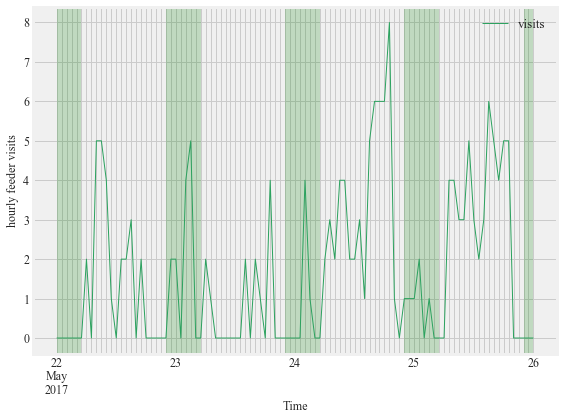

In [76]:
f, (ax1)  = plt.subplots(1, 1, figsize=(8,6))
HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967AD', 
              start = '2017-05-22', 
              end ='2017-05-26',Bird_summary_data= Bird_summary,  ax = ax1)

#f.suptitle('Hummingbird visits to feeders', fontsize = 24)
f.tight_layout()#rect=[0, 0.03, 1, 0.95]
f.savefig(output_path+'/Figure 7.png', dpi = dpi)
f.savefig(output_path+'/Figure 7.eps',format = 'eps',  dpi=dpi)
plt.show()

# Figure S1:

### Activity of PIT tagged Anna’s Hummingbirds (Calypte anna) detected between 10 PM to 4 AM for the study period (September 2016- March 2018).  This nocturnal activity was only seen at study site 2 in northern California. The shaded portion represents night time. Days preceding and succeeding the night 

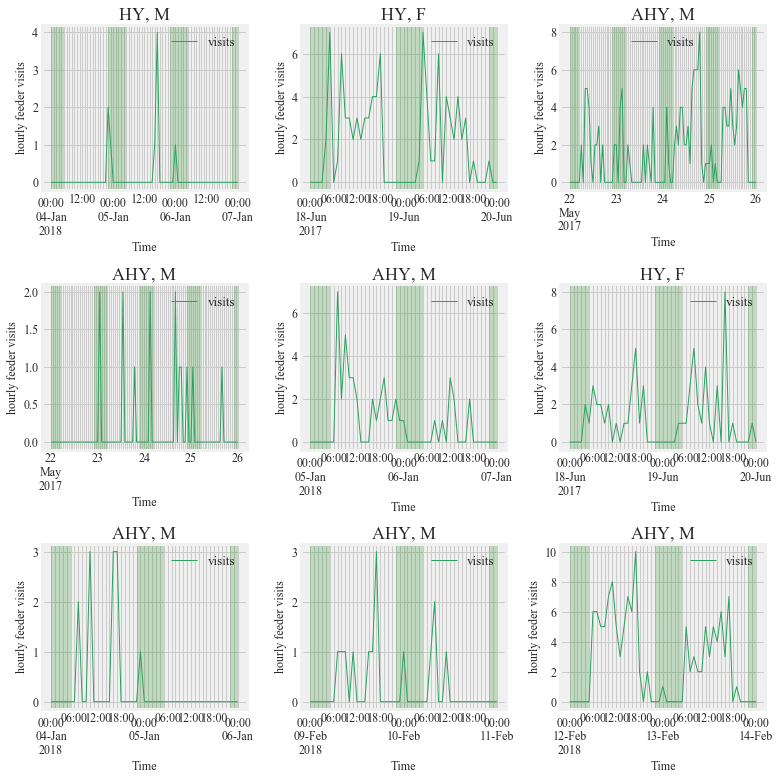

In [77]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6), (ax7,ax8,ax9))  = plt.subplots(nrows = 3, ncols = 3, figsize = (11,11))

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967A4', 
              start = '2018-01-04', 
              end ='2018-01-07',Bird_summary_data= Bird_summary,  ax = ax1, title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967A7', 
              start = '2017-06-18', 
              end ='2017-06-20',Bird_summary_data= Bird_summary,  ax = ax2,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967AD', 
              start = '2017-05-22', 
              end ='2017-05-26',Bird_summary_data= Bird_summary,  ax = ax3,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967AF', 
              start = '2017-05-22', 
              end ='2017-05-26',Bird_summary_data= Bird_summary,  ax = ax4,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967AF', 
              start = '2018-01-05', 
              end ='2018-01-07',Bird_summary_data= Bird_summary,  ax = ax5,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967BC', 
              start = '2017-06-18', 
              end ='2017-06-20',Bird_summary_data= Bird_summary,  ax = ax6,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967BF', 
              start = '2018-01-04', 
              end ='2018-01-06',Bird_summary_data= Bird_summary,  ax = ax7,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967BF', 
              start = '2018-02-09', 
              end ='2018-02-11',Bird_summary_data= Bird_summary,  ax = ax8,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.1D593D7848', 
              start = '2018-02-12', 
              end ='2018-02-14',Bird_summary_data= Bird_summary,  ax = ax9,title = True)


plt.tight_layout()
plt.savefig(output_path+'/Figure S3.png', dpi = dpi)
plt.savefig(output_path+'/Figure S3.eps',format = 'eps',  dpi=dpi)
plt.show()

# Feeder preference

# Figure 9:

### The preference of individual Anna’s and Allen’s Hummingbirds for the primary, secondary, and tertiary feeders in Site 2 in Northern California. Solid circles show the data points.

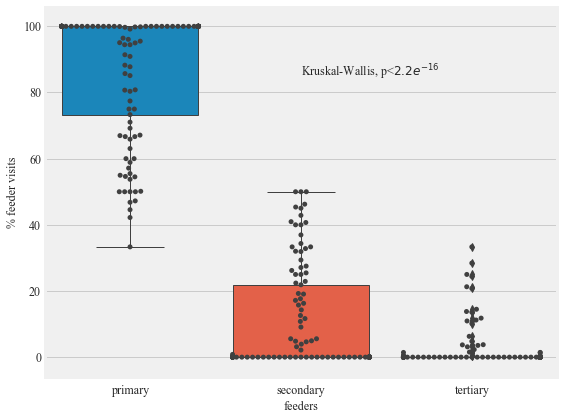

In [78]:
reader_predilection.columns =reader_predilection.columns.get_level_values(0)
t = reader_predilection.drop('A1', axis=1)
#t.set_index('ID',inplace= True)
primary = []
secondary = []
tertiary = []
bird = []
for index,row in t.iterrows():
    if row.values.max() !=0:
        r = sorted(row.values, reverse= True)
        total  = float(row.values.sum())
        bird.append(index)
        primary.append(r[0]/total)
        secondary.append(r[1]/total)
        tertiary.append(r[2]/total)

r_p = pd.DataFrame({'primary':primary,'secondary':secondary,'tertiary':tertiary}, index=bird)
r_p = r_p*100
###################################################################################################
###################################################################################################
#r_p.head()
t = t[(t.T != 0).any()]
t.idxmax(axis=1).value_counts()
###################################################################################################
###################################################################################################
primary = []
secondary = []
tertiary = []
bird = []
for index,row in t.iterrows():
    if row.values.max() !=0:
        r = sorted(row.values, reverse= True)
        total  = float(row.values.sum())
        bird.append(index)
        primary.append(r[0]/total)
        secondary.append(r[1]/total)
        tertiary.append(r[2]/total)
        
###################################################################################################
###################################################################################################

import seaborn as sns
f, (ax1)  = plt.subplots(1, 1, figsize=(8,6))
sns.boxplot(x="variable", y="value", data=r_p.melt(), ax = ax1)
ax = sns.swarmplot(x="variable", y="value", data=r_p.melt(), color=".25", ax = ax1)
ax1.set_xlabel('feeders')
ax1.set_ylabel('% feeder visits')
ax1.text(1, 85, r'Kruskal-Wallis, p<$2.2e^{-16}$')
f.tight_layout()#rect=[0, 0.03, 1, 0.95]
f.savefig(output_path+'/Figure 8.png', dpi = dpi)
f.savefig(output_path+'/Figure 8.eps',format = 'eps',  dpi=dpi)
plt.show()

In [79]:
r_p.describe()

,primary,secondary,tertiary
count,109.000000,109.000000,109.000000
mean,86.674542,10.809845,2.515613
std,19.231371,15.635133,6.478267
min,33.333333,0.000000,0.000000
25%,73.317308,0.000000,0.000000
50%,100.000000,0.000000,0.000000
75%,100.000000,21.875000,0.144509
max,100.000000,50.000000,33.333333


## Interactions contact network

In [80]:
interactions = Hxnet.get_intreactions(data=data)
interactions.shape

(1635, 28)

In [81]:
print ('there were '+ str(interactions.shape[0])+' interactions observed during the study period')

there were 1635 interactions observed during the study period


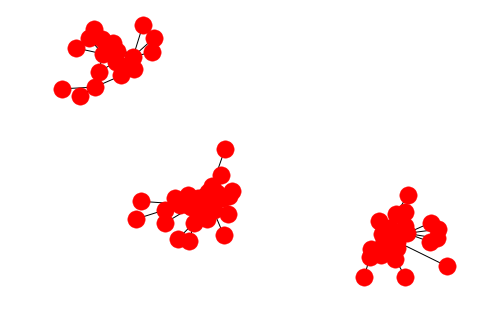

In [82]:
Hnet = Hxnet.get_interaction_networks(network_name='hummingbirds', data = data, 
                                      interactions = interactions, 
                                      location = output_path)   

In [83]:
import networkx as nx
nx.write_graphml(Hnet, output_path +'/'+ "hummingbirds_interaction.graphml")

In [84]:
from taggit import interactions as Hxnet

In [85]:
a = data.groupby(['ID', 'Sex', 'Age', 'Location', 'Species']).size().reset_index().rename(columns={0:'count'})

In [86]:
from fa2 import ForceAtlas2
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=0.5,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=1.0,
                          strongGravityMode=False,
                          gravity=5.0,

                          # Log
                          verbose=True)

# Figure 10: (Manuscript has a figure generated using Gephi)

### Contact network of tagged Anna’s (pink nodes) and Allen’s hummingbirds (green nodes). The sex of the hummingbirds indicated by M for males and F for females. The size of the node is proportional to the degree of the interaction. Edges represent time spent together at the feeding station and the width of the edge width is proportional to the time spent together.

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1269.04it/s]


('BarnesHut Approximation', ' took ', '0.29', ' seconds')
('Repulsion forces', ' took ', '0.82', ' seconds')
('Gravitational forces', ' took ', '0.02', ' seconds')
('Attraction forces', ' took ', '0.10', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.07', ' seconds')


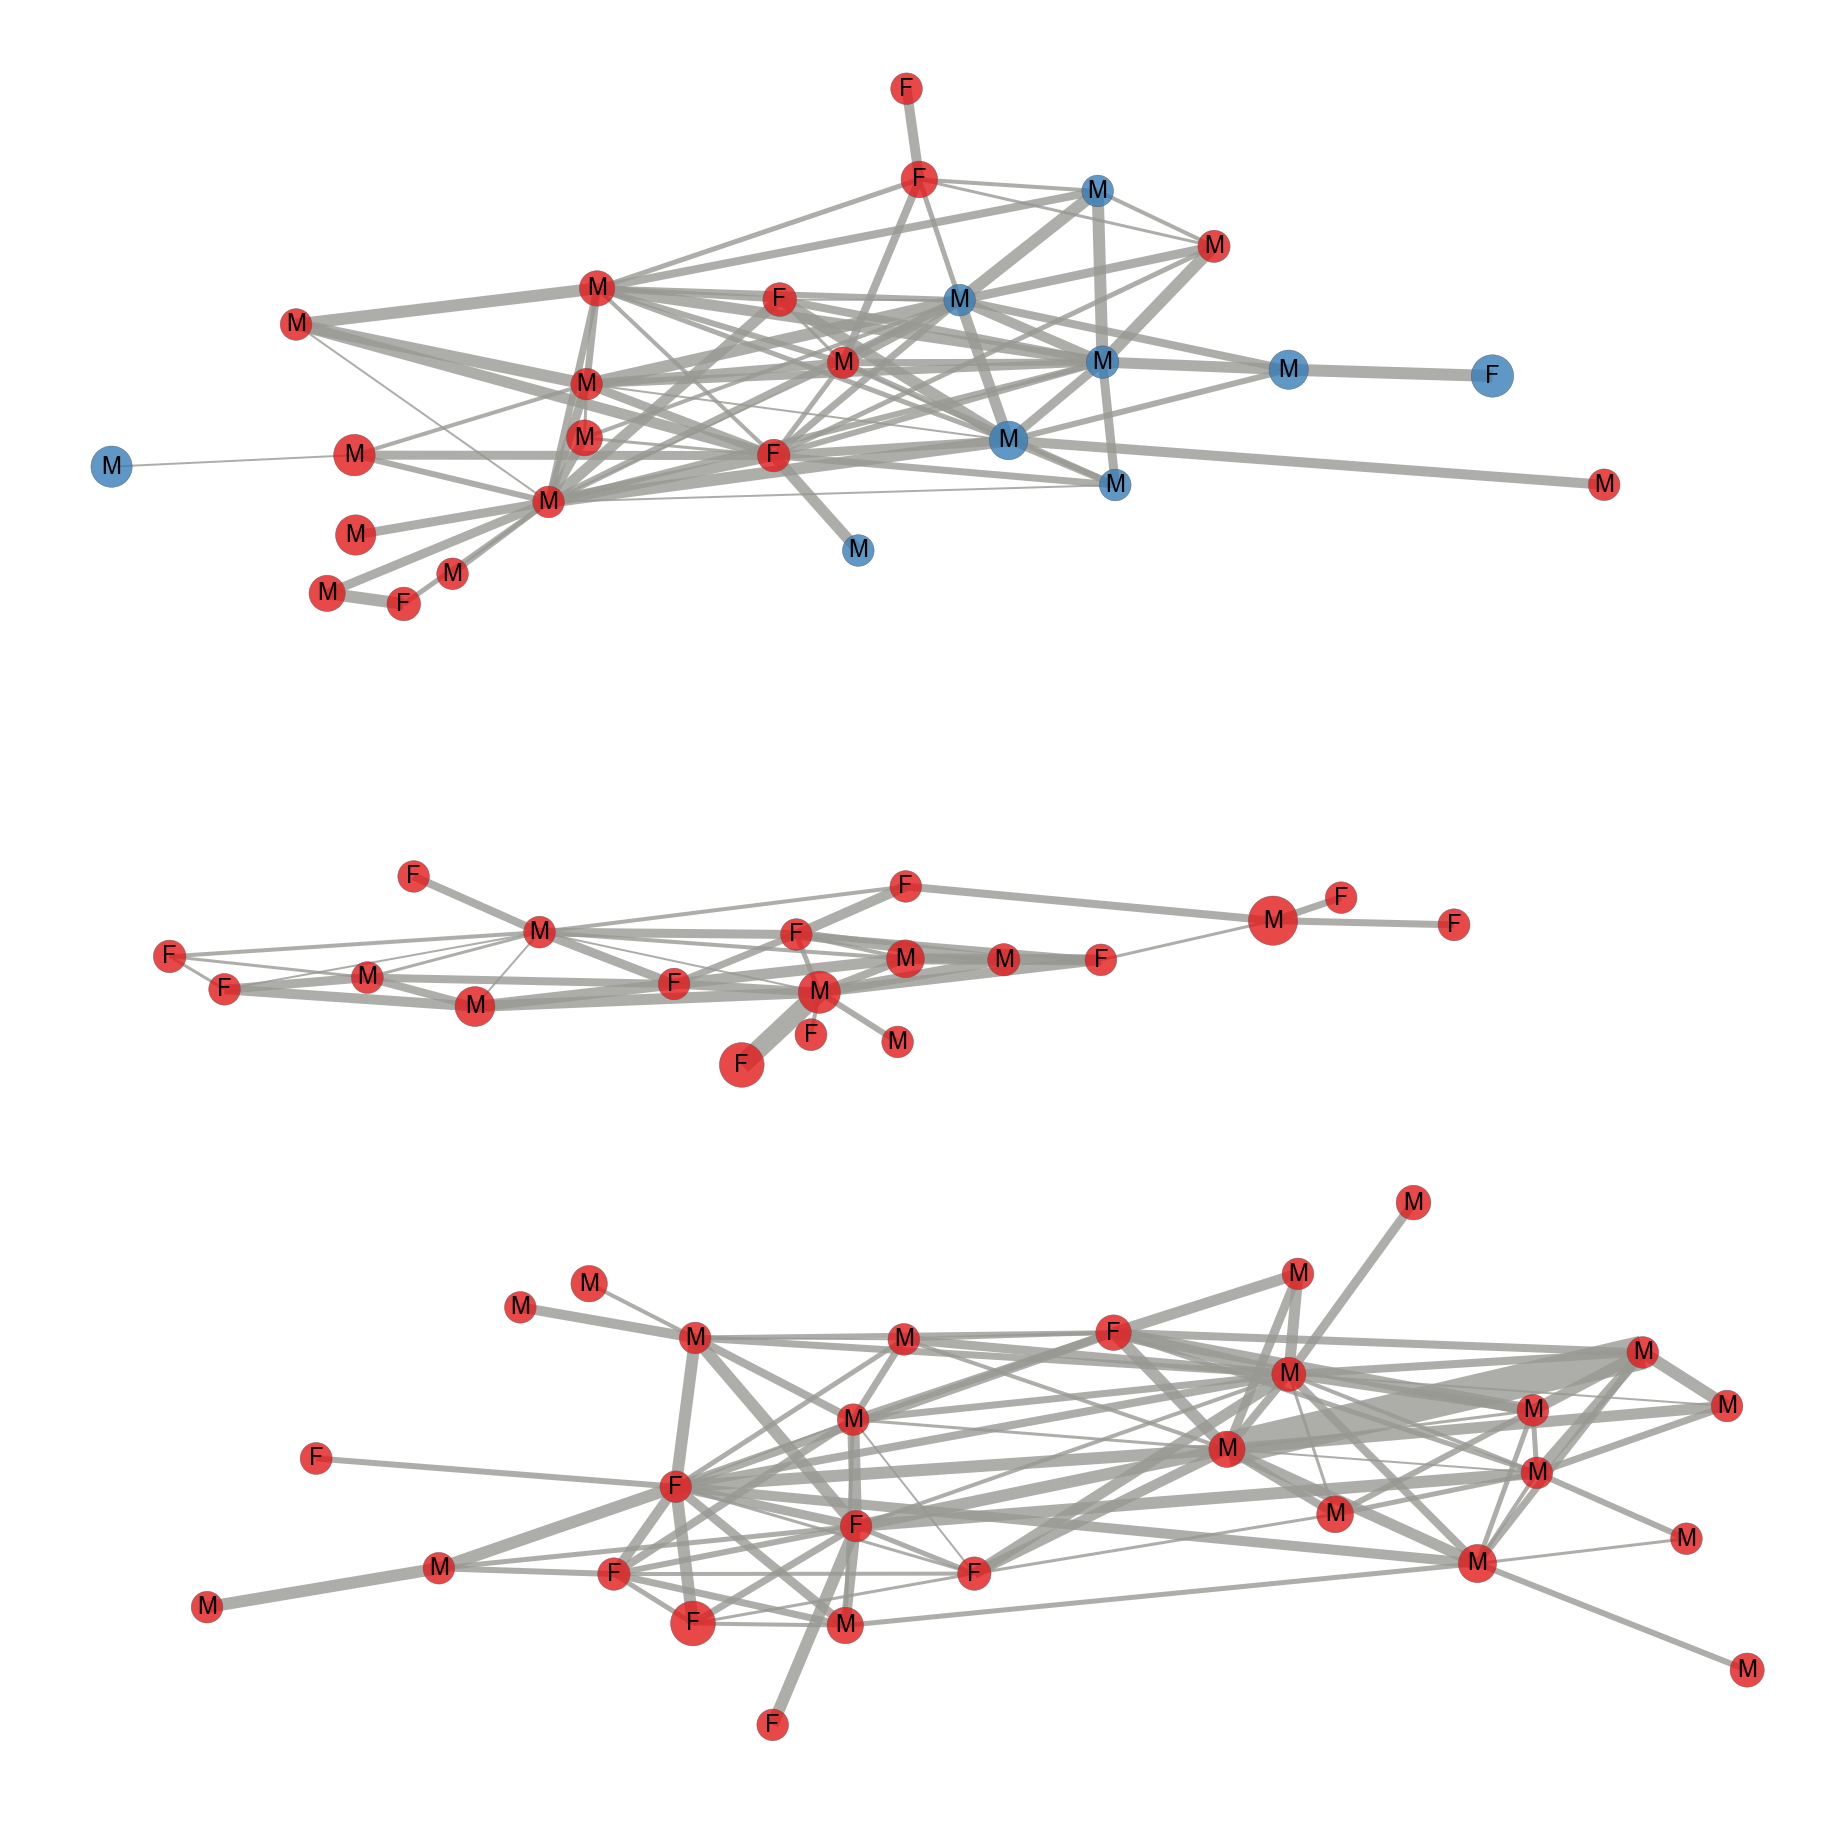

In [87]:
color_map = {"ANHU":'#e41a1c', "ALHU":'#377eb8'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#999994',
    'font_weight': 'regular',
    'label': True,
    'alpha': 0.8
}
colors = [color_map[Hnet.node[node]['Species']] for node in Hnet]
#sizes = [G.node[node]['nodesize']*10 for node in G]
w = nx.get_edge_attributes(Hnet,'weight').values()
w2 = [x -1 for x in w]
s = [1000+(10000*np.log2(x+1))+(np.log2(np.log2(x+1)+1)*10000) for x in nx.betweenness_centrality(Hnet,).values()]
l = nx.get_node_attributes(Hnet, 'Sex').values()
mapping=nx.get_node_attributes(Hnet, 'Sex')
#Hnet=nx.relabel_nodes(Hnet,mapping)
"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""

positions = forceatlas2.forceatlas2_networkx_layout(Hnet, pos=None, iterations=2000)

nx.draw(Hnet, node_color=colors, node_size=s, pos=positions, width = w,  **options)
nx.draw_networkx_labels(Hnet,positions,mapping,font_size=24)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.savefig(output_path+'/Network_diagram.png', dpi = dpi)
plt.savefig(output_path+'/Network_diagram.eps', format = 'eps', dpi = dpi)
plt.show()

## Analysis for comparing degree distrbutions

# Figure S2:

### Results of permutation-based regression analysis to understand the effect of age and sex on the degree of in the observed network. Blue lines show the distribution of coefficients after 10,000 permutations. Red lines show original coefficients.

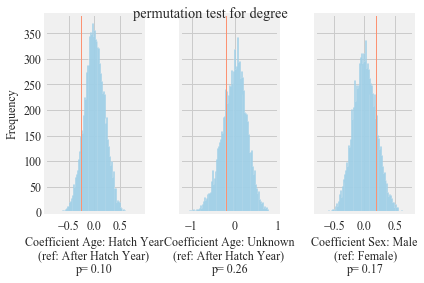

Wall time: 1min 19s


In [88]:
%%time
Hxnet.run_permutation_test(dependent='degree', network= Hnet, number_of_permutations = 10000, output_path = output_path)

# Figure S3:

### Results of permutation-based regression analysis to understand the effect of age and sex on the betweenness centrality of in the observed network. Blue lines show the distribution of coefficients after 10,000 permutations. Red lines show original coefficients.

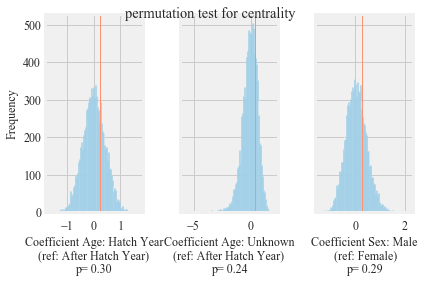

Wall time: 1min 21s


In [89]:
%%time
Hxnet.run_permutation_test(dependent='centrality', network= Hnet, number_of_permutations = 10000, output_path = output_path)

In [90]:
males = zip(*filter(lambda (n, d): d['Sex'] == 'M', Hnet.nodes(data=True)))[0]
females = zip(*filter(lambda (n, d): d['Sex'] == 'F', Hnet.nodes(data=True)))[0]
HY = zip(*filter(lambda (n, d): d['Age'] == 'HY', Hnet.nodes(data=True)))[0]
AHY = zip(*filter(lambda (n, d): d['Age'] == 'AHY', Hnet.nodes(data=True)))[0]

#####################################################################################
#####################################################################################

m_d = sorted(zip(*Hnet.degree(males))[1], reverse=True)
f_d = sorted(zip(*Hnet.degree(females))[1], reverse=True)
hy_d = sorted(zip(*Hnet.degree(HY))[1], reverse=True)
ahy_d = sorted(zip(*Hnet.degree(AHY))[1], reverse=True)

#####################################################################################
#####################################################################################

bc = nx.betweenness_centrality(Hnet)
males_bc = { m: bc[m] for m in males }
females_bc = { m: bc[m] for m in females }
AHY_bc = { m: bc[m] for m in AHY }
HY_bc = { m: bc[m] for m in HY }

In [91]:
degree = sorted(zip(*Hnet.degree(males))[1], reverse=True)

max(degree)

16

In [92]:
min(degree)

1

#### degree distbutions between males and females statistical comparison

In [93]:
stats.ks_2samp(m_d, f_d)

Ks_2sampResult(statistic=0.1883333333333333, pvalue=0.5583719606128525)

#### degree distbutions between hatch year and after hatch years statistical comparison

In [94]:
stats.ks_2samp(hy_d, ahy_d)

Ks_2sampResult(statistic=0.21169354838709678, pvalue=0.433553562913418)

#### betweenness centrality males and females years statistical comparison

In [95]:
stats.ks_2samp(males_bc.values(), females_bc.values())

Ks_2sampResult(statistic=0.16416666666666674, pvalue=0.7282154106780466)

#### betweenness centrality hatch year and after hatch years statistical comparison

In [96]:
stats.ks_2samp(AHY_bc.values(), HY_bc.values())

Ks_2sampResult(statistic=0.09173387096774188, pvalue=0.9988423204076042)

# Figure 10:
### Contact network of tagged Anna’s (pink nodes) and Allen’s hummingbirds (green nodes). The sex of the hummingbirds indicated by M for males and F for females. The size of the node is proportional to the degree of the interaction. Edges represent time spent together at the feeding station and the width of the edge width is proportional to the time spent together.

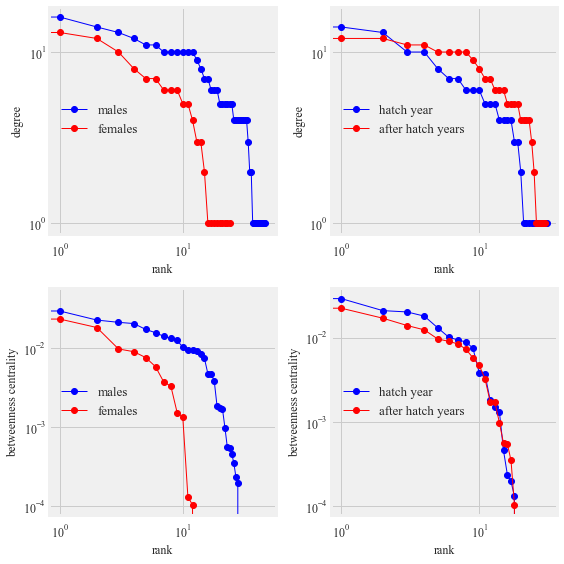

In [97]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8,8))
ax1.loglog(m_d, 'b-', marker='o', label = 'males')
ax1.loglog(f_d, 'r-', marker='o', label = 'females')
ax1.legend()
ax1.set_ylabel("degree")
ax1.set_xlabel("rank")

ax2.loglog(hy_d, 'b-', marker='o', label = 'hatch year')
ax2.loglog(ahy_d, 'r-', marker='o', label = 'after hatch years')
ax2.legend()
ax2.set_ylabel("degree")
ax2.set_xlabel("rank")

ax3.loglog(sorted (males_bc.values(), reverse= True), 'b-', marker='o', label = 'males')
ax3.loglog(sorted (females_bc.values(), reverse= True), 'r-', marker='o', label = 'females')
ax3.legend()
ax3.set_ylabel("betweenness centrality")
ax3.set_xlabel("rank")

ax4.loglog(sorted (HY_bc.values(), reverse= True), 'b-', marker='o', label = 'hatch year')
ax4.loglog(sorted (AHY_bc.values(), reverse= True), 'r-', marker='o', label = 'after hatch years')
ax4.legend()
ax4.set_ylabel("betweenness centrality")
ax4.set_xlabel("rank")
plt.tight_layout()
plt.savefig(output_path+'/Figure 10.png', dpi= dpi)
plt.savefig(output_path+'/Figure 10.eps',format= 'eps', dpi= dpi)
plt.show()

## Table 6

In [98]:
i = list(pd.unique(interactions[['ID', 'second_bird']].values.ravel('K')))
interacted_birds = meta[meta['Tag Hex'].isin(i)]
inter = pd.pivot_table(data=interacted_birds, index='Species', columns=['Sex', 'Age'] , aggfunc= 'count', values='Tag Hex', fill_value=0, margins= True)
inter

Sex       F           M         All
Age     AHY  HY UNK AHY  HY UNK    
Species                            
ALHU      0   0   1   3   1   4   9
ANHU     10  14   0  18  17   5  64
All      10  14   1  21  18   9  73

In [99]:
pd.pivot_table(data=interacted_birds, index='Species', columns='Sex' , aggfunc= 'count', values='Tag Hex', fill_value=0, margins= True)

Sex,F,M,All
Species,,,
ALHU,1,8,9
ANHU,24,40,64
All,25,48,73


### Types of interactions

In [100]:
m2 = meta[['Tag Hex', 'Species', 'Age', 'Sex']]
m2.columns = ['second_bird', 'Species2', 'Age2', 'Sex2']
i2 = pd.merge(interactions, m2, on='second_bird', how='left')
def returnTypeInt (c):
    if [(c.Sex == 'M') & (c.Sex2 == 'M')]:
        return 'MM'
    elif [(c.Sex == 'M') & (c.Sex2 == 'F')]:
        return 'MF'
    elif [(c.Sex == 'F') & (c.Sex2 == 'M')]:
        return 'MF'
    elif [(c.Sex == 'F') & (c.Sex2 == 'F')]:
        return 'FF'
    else:
        return 'Problem'

In [101]:
conditions = [
    (i2['Sex'] == 'M') & (i2['Sex2'] == 'M'),
    (i2['Sex'] == 'M') & (i2['Sex2'] == 'F'),
    (i2['Sex'] == 'F') & (i2['Sex2'] == 'M'),
    (i2['Sex'] == 'F') & (i2['Sex2'] == 'F')
]
choices = ['MM', 'MF', 'MF', 'FF']
i2['Type'] = np.select(conditions, choices, default='MM')


conditions2 = [
    (i2['overlap'] <= 0),
    (i2['overlap'] > 0)
]#(i2['overlap'] == 0)
choices = ['short_interactions',  'long_interactions'] #'medium_interactions',
i2['DurationType'] = np.select(conditions2, choices, default='short_interaction')

#i2['Type'] = i2.apply(returnTypeInt, axis=1)
i2['Type'].value_counts()

MM    1020
MF     491
FF     124
Name: Type, dtype: int64

In [102]:
#i2['Type'] = i2.apply(returnTypeInt, axis=1)
i2['Type'].value_counts()

MM    1020
MF     491
FF     124
Name: Type, dtype: int64

In [103]:
i2['DurationType'].value_counts()

short_interactions    1608
long_interactions       27
Name: DurationType, dtype: int64

In [104]:
inter_pv = pd.pivot_table(columns='DurationType', index='Type',data=i2, fill_value=0, aggfunc='count', values='ID')
inter_pv

DurationType,long_interactions,short_interactions
Type,,
FF,7,117
MF,4,487
MM,16,1004


In [105]:
i2.Age2.unique()

array([u'HY', u'AHY', u'UNK'], dtype=object)

In [106]:
conditions3 = [
    (i2['Age'] == 'HY') & (i2['Age2'] == 'HY'),
    (i2['Age'] == 'HY') & (i2['Age2'] == 'AHY'),
    (i2['Age'] == 'HY') & (i2['Age2'] == 'UNK'),
    
    (i2['Age'] == 'AHY') & (i2['Age2'] == 'HY'),
    (i2['Age'] == 'AHY') & (i2['Age2'] == 'AHY'),
    (i2['Age'] == 'AHY') & (i2['Age2'] == 'UNK'),
    
    (i2['Age'] == 'UNK') & (i2['Age2'] == 'HY'),
    (i2['Age'] == 'UNK') & (i2['Age2'] == 'AHY'),
    (i2['Age'] == 'UNK') & (i2['Age2'] == 'UNK'),
    ]
choices = ['HyHy', 'HyAHy', 'HyUNK', 'HyAHy', 'AHyAHy', 'AHyUNK', 'HyUNK', 'AHyUNK', 'UNKUNK']
i2['TypeAge'] = np.select(conditions3, choices, default='UNKUNK')

In [107]:
i2['TypeAge'].value_counts()

HyHy      494
HyAHy     430
AHyAHy    303
AHyUNK    240
HyUNK     126
UNKUNK     42
Name: TypeAge, dtype: int64

In [108]:
age_pv = pd.pivot_table(columns='DurationType', index='TypeAge',data=i2, fill_value=0, aggfunc='count', values='ID')
age_pv

DurationType,long_interactions,short_interactions
TypeAge,,
AHyAHy,4,299
AHyUNK,2,238
HyAHy,8,422
HyHy,13,481
HyUNK,0,126
UNKUNK,0,42


In [109]:
i2.set_index(pd.DatetimeIndex(i2['visit_start']), inplace= True)

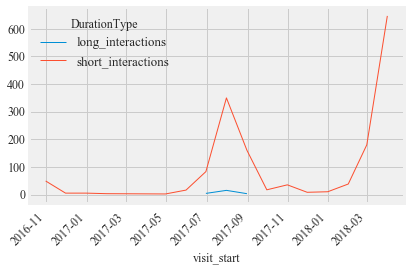

In [110]:
i2.groupby([ pd.Grouper(freq='M'), 'DurationType'])['ID'].count().unstack('DurationType').plot(kind="line", rot =45, stacked=False)
plt.show()

In [111]:
i2.groupby([ pd.Grouper(freq='M'), 'DurationType'])['ID'].count().unstack('DurationType')

DurationType,long_interactions,short_interactions
visit_start,,
2016-10-31,NaN,49.0
2016-11-30,NaN,5.0
2016-12-31,NaN,5.0
2017-01-31,NaN,3.0
2017-04-30,NaN,2.0
2017-05-31,NaN,16.0
2017-06-30,4.0,83.0
2017-07-31,15.0,350.0
2017-08-31,3.0,160.0


In [112]:
i2['visit_start'] = pd.to_datetime(i2['visit_start'])
i2.set_index(pd.DatetimeIndex(i2['visit_start']), inplace= True)
multi_index = pd.MultiIndex.from_product([pd.date_range('2016-9-22', i2.visit_start.max().date(),freq='1H'), i2['DurationType'].unique()], names=['Date', 'DurationType'])
a = i2.groupby([ pd.Grouper(freq='1H'), 'DurationType'])['ID'].count().reindex(multi_index, fill_value=0).unstack('DurationType').reset_index()#.plot(kind="bar", rot =0, stacked=True).res
a['h'] = pd.to_datetime(a['Date'], format= '%H:%M:%S' ).dt.time
agg_funcs = {'long_interactions':[np.mean, 'sem'], 'short_interactions':[np.mean, 'sem']}
a = a.groupby(a.h).agg(agg_funcs).reset_index()
a.columns = a.columns.droplevel(0)
a.columns = ['hour', 'mean_long', 'sem_long', 'mean_short', 'sem_short',]
#a['hour'] = pd.to_datetime(a['hour'])
a = a.set_index(a['hour'])
a

,hour,mean_long,sem_long,mean_short,sem_short
hour,,,,,
00:00:00,00:00:00,0.000000,0.000000,0.000000,0.000000
01:00:00,01:00:00,0.000000,0.000000,0.000000,0.000000
02:00:00,02:00:00,0.000000,0.000000,0.000000,0.000000
03:00:00,03:00:00,0.000000,0.000000,0.000000,0.000000
04:00:00,04:00:00,0.003604,0.002546,0.030631,0.009624
05:00:00,05:00:00,0.003604,0.002546,0.172973,0.032830
06:00:00,06:00:00,0.000000,0.000000,0.214414,0.036315
07:00:00,07:00:00,0.000000,0.000000,0.194595,0.036293
08:00:00,08:00:00,0.007207,0.004407,0.227027,0.039977


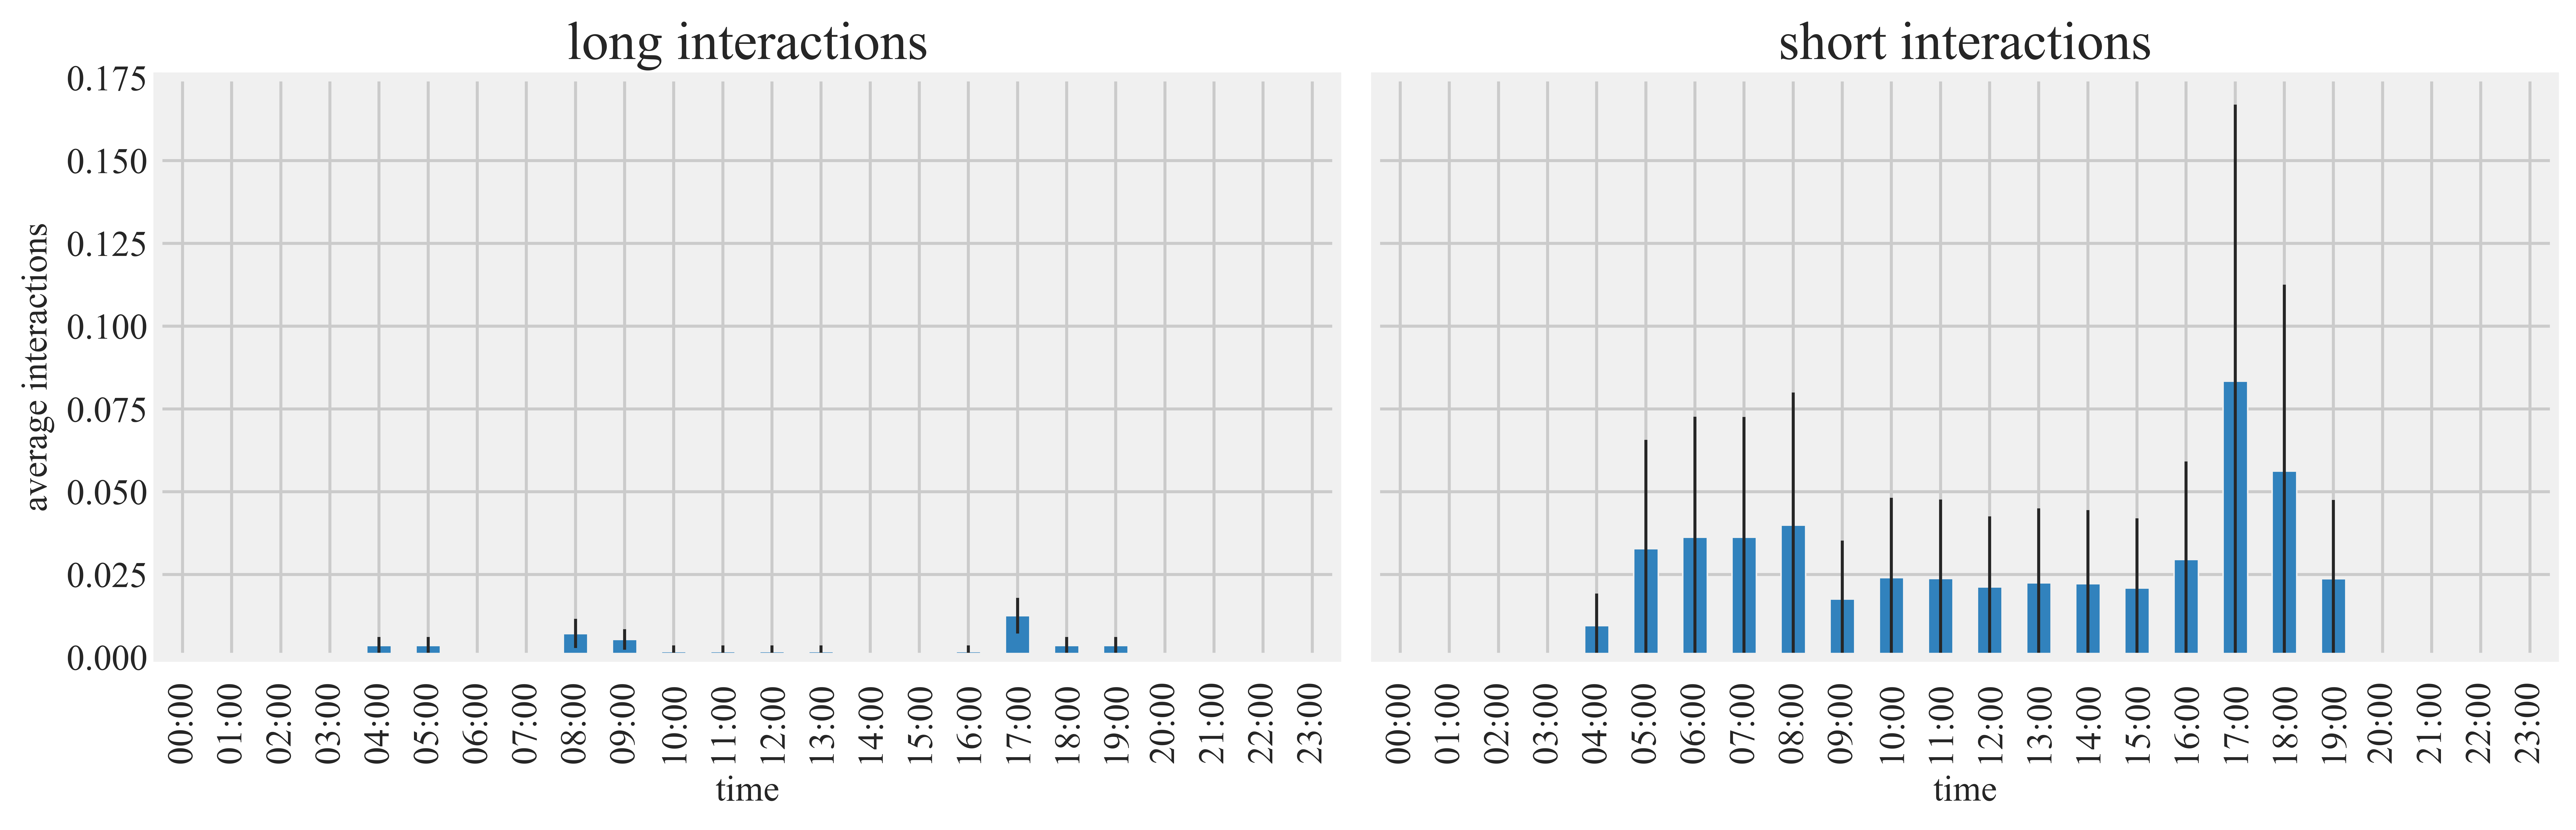

In [113]:
plt.rcParams['font.family'] = 'Times New Roman'
f, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,4), dpi=dpi, sharey=True, )
a.plot(y='mean_long', kind = 'bar', yerr='sem_long', color='#3182bd',ax= ax1, legend=False)
a.plot(y='sem_short', kind = 'bar', yerr='sem_short', color='#3182bd',ax= ax2, legend=False)
yaxis_text = 'average interactions'
ax1.set_ylabel(yaxis_text)
ax2.set_ylabel(yaxis_text)

ax1.set_title('long interactions')
ax2.set_title('short interactions')

ticks = [ x.strftime('%H:%M') for x in a.index.values ]
ax1.set_xticklabels(ticks)
ax2.set_xticklabels(ticks)

ax1.set_xlabel('time')
ax2.set_xlabel('time')
plt.tight_layout()
#plt.savefig(output_path+'/Interactions_daily_variation.png', dpi=600, figsize = (6,4))
plt.show()